In [1]:
# local imports
from experiments import run_experiment, multi_trail_experiment
from utils import *

# global imports
import matplotlib.pyplot as plt
import numpy as np
import gym
#import gym_toytext

In [2]:
default_config = {"num_episodes": 1000,
                  "num_trails": 5,
                  "q_discount_factor": 1.0,
                  "q_alpha": 0.1,
                  "q_epsilon": 0.1,
                  "q_decay_rate":1.0,
                  "dq_discount_factor": 1.0,
                  "dq_alpha": 0.1,
                  "dq_epsilon": 0.5,
                  "dq_decay_rate":1.0,}

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 18893.54it/s]


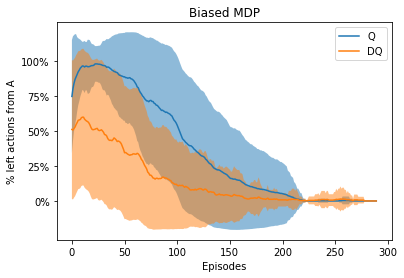

In [3]:
from BiasMDP import BiasMDP

env_name = 'BiasMDP'
environment  = BiasMDP()

config = default_config.copy()
config["num_episodes"] = 300
config["num_trails"] = 50

config["q_decay_rate"] = 0.01 ** (1.0 / config["num_episodes"])
config["dq_decay_rate"] = config["q_decay_rate"]

results = multi_trail_experiment(env_name, environment, config, final=True)

smooth = 10
for j in list(results.keys()):
    mean = running_mean(results[j]['episode_length'][0], smooth)
    std = running_mean(results[j]['episode_length'][1], smooth)
    plt.plot(mean, label=f"{j}")
    plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
plt.legend()
plt.ylabel("% left actions from A")
plt.xlabel("Episodes")
plt.yticks([1,1.25,1.5,1.75,2], ["0%", "25%", "50%", "75%", "100%"])
plt.title("Biased MDP")
plt.savefig(f'figures/{env_name}.pdf', dpi=300)
plt.show()

In [4]:
env_name = 'Taxi-v2'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 1000
config["num_trails"] = 5

config["q_decay_rate"] = 0.01 ** (1.0 / config["num_episodes"])
config["dq_decay_rate"] = config["q_decay_rate"]

parameter_search(environment, config, "discount_factor", [0, 0.5, 0.9, 0.99, 1])

/home/mario/miniconda3/envs/rlcourse/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|███████████████████████████████████████| 1000/1000 [00:10<00:00, 99.07it/s]

discount_factor = 0: 	0.8739, 	0.6960
discount_factor = 0.5: 	7.7886, 	2.4134
discount_factor = 0.9: 	8.5468, 	6.6784
discount_factor = 0.99: 	8.6283, 	7.1757
discount_factor = 1: 	8.6372, 	7.0993


In [5]:
env_name = 'Taxi-v2'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 1000
config["num_trails"] = 5

config["q_decay_rate"] = 0.01 ** (1.0 / config["num_episodes"])
config["dq_decay_rate"] = config["q_decay_rate"]

config["q_discount_factor"] = 0.99
config["dq_discount_factor"] = 0.99

parameter_search(environment, config, "alpha", [0.01, 0.05, 0.1, 0.5, 1])

/home/mario/miniconda3/envs/rlcourse/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|██████████████████████████████████████| 1000/1000 [00:06<00:00, 154.58it/s]

alpha = 0.01: 	2.7126, 	1.8340
alpha = 0.05: 	7.4263, 	5.0945
alpha = 0.1: 	8.6387, 	7.1021
alpha = 0.5: 	9.5710, 	8.6285
alpha = 1: 	9.6699, 	8.0120


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 197.02it/s]


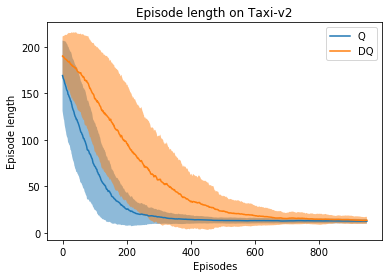

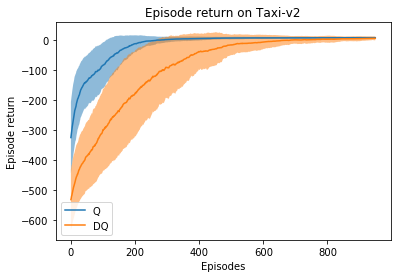

In [6]:
env_name = 'Taxi-v2'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 1000
config["num_trails"] = 10

config["q_decay_rate"] = 0.01 ** (1.0 / config["num_episodes"])
config["dq_decay_rate"] = config["q_decay_rate"]

config["q_alpha"] = 0.5
config["dq_alpha"] = 0.5
config["q_discount_factor"] = 0.99
config["dq_discount_factor"] = 0.99

results = multi_trail_experiment(env_name, environment, config, final=True)

plot_results(results, env_name, 50)

In [7]:
env_name = 'FrozenLake-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 25000
config["num_trails"] = 2

config["q_decay_rate"] = 0.01 ** (1.0 / config["num_episodes"])
config["dq_decay_rate"] = config["q_decay_rate"]

parameter_search(environment, config, "discount_factor", [0, 0.5, 0.9, 0.99, 1])

/home/mario/miniconda3/envs/rlcourse/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|████████████████████████████████████| 25000/25000 [01:18<00:00, 317.05it/s]

discount_factor = 0: 	0.0135, 	0.0090
discount_factor = 0.5: 	0.1341, 	0.0586
discount_factor = 0.9: 	0.3343, 	0.2888
discount_factor = 0.99: 	0.3674, 	0.3363
discount_factor = 1: 	0.0015, 	0.2172


In [8]:
env_name = 'FrozenLake-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 25000
config["num_trails"] = 2

config["q_decay_rate"] = 0.01 ** (1.0 / config["num_episodes"])
config["dq_decay_rate"] = config["q_decay_rate"]

config["q_discount_factor"] = 0.99
config["dq_discount_factor"] = 0.99

parameter_search(environment, config, "alpha", [0.01, 0.05, 0.1, 0.5, 1])

100%|███████████████████████████████████| 25000/25000 [00:09<00:00, 2539.69it/s]

alpha = 0.01: 	0.0586, 	0.0350
alpha = 0.05: 	0.3789, 	0.3609
alpha = 0.1: 	0.3674, 	0.3559
alpha = 0.5: 	0.3619, 	0.1491
alpha = 1: 	0.0080, 	0.0055


100%|████████████████████████████████████| 30000/30000 [00:49<00:00, 602.16it/s]


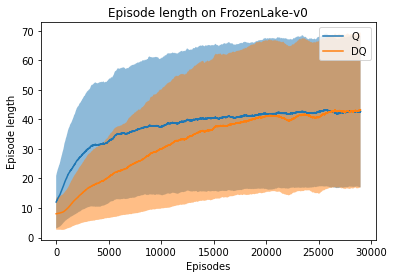

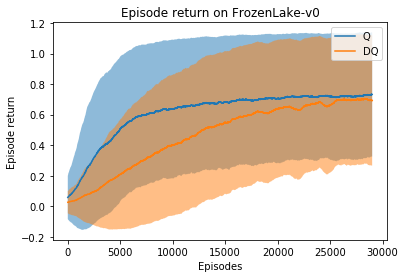

In [9]:
env_name = 'FrozenLake-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 30000
config["num_trails"] = 10

config["q_decay_rate"] = 0.01 ** (1.0 / config["num_episodes"])
config["dq_decay_rate"] = config["q_decay_rate"]

config["q_discount_factor"] = 0.99
config["dq_discount_factor"] = 0.99
config["q_alpha"] = 0.05
config["dq_alpha"] = 0.05

results = multi_trail_experiment(env_name, environment, config, final=True)

plot_results(results, env_name, 1000)

/home/mario/miniconda3/envs/rlcourse/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 1578.57it/s]


100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 2629.10it/s]


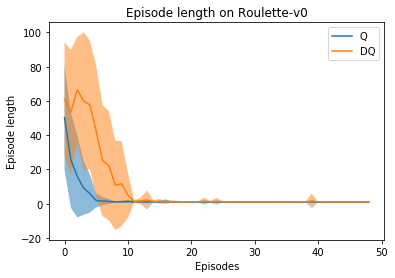

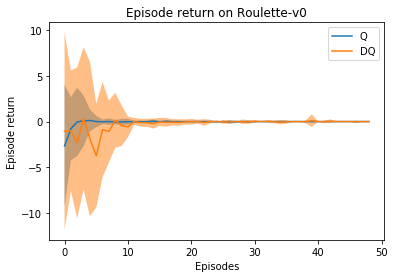

In [12]:
env_name = 'Roulette-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 50
config["num_trails"] = 50

config["q_decay_rate"] = 0.01 ** (1.0 / config["num_episodes"])
config["dq_decay_rate"] = config["q_decay_rate"]

# Reward signal should not propagate to past actions, only immediate reward should be considered

config['q_discount_factor'] = 0
config['dq_discount_factor'] = 0

results = multi_trail_experiment(env_name, environment, config, final=True)

plot_results(results, env_name, 1)

In [13]:
env_name = 'Blackjack-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 5000
config["num_trails"] = 5

config["q_decay_rate"] = 0.01 ** (1.0 / config["num_episodes"])
config["dq_decay_rate"] = config["q_decay_rate"]

parameter_search(environment, config, "discount_factor", [0, 0.5, 0.9, 0.99, 1])

/home/mario/miniconda3/envs/rlcourse/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|█████████████████████████████████████| 5000/5000 [00:00<00:00, 7668.04it/s]

discount_factor = 0: 	-0.0312, 	-0.0324
discount_factor = 0.5: 	-0.0360, 	-0.0538
discount_factor = 0.9: 	-0.0441, 	-0.0583
discount_factor = 0.99: 	-0.0477, 	-0.0523
discount_factor = 1: 	-0.0706, 	-0.0513


In [16]:
env_name = 'Blackjack-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 5000
config["num_trails"] = 5

config["q_decay_rate"] = 0.01 ** (1.0 / config["num_episodes"])
config["dq_decay_rate"] = config["q_decay_rate"]

config["q_discount_factor"] = 0
config["dq_discount_factor"] = 0

parameter_search(environment, config, "alpha", [0.01, 0.05, 0.1, 0.5, 1])

100%|█████████████████████████████████████| 5000/5000 [00:00<00:00, 7907.78it/s]

alpha = 0.01: 	-0.0335, 	-0.0288
alpha = 0.05: 	-0.0261, 	-0.0268
alpha = 0.1: 	-0.0297, 	-0.0463
alpha = 0.5: 	-0.0368, 	-0.0343
alpha = 1: 	-0.0719, 	-0.0579


/home/mario/miniconda3/envs/rlcourse/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|█████████████████████████████████████| 5000/5000 [00:00<00:00, 7996.94it/s]


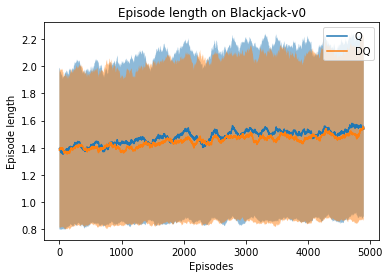

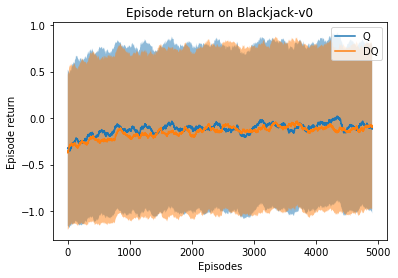

In [18]:
env_name = 'Blackjack-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 5000
config["num_trails"] = 10

config["q_decay_rate"] = 0.1 ** (1.0 / config["num_episodes"])
config["dq_decay_rate"] = config["q_decay_rate"]

config["q_discount_factor"] = 0
config["dq_discount_factor"] = 0
config["q_alpha"] = 0.05
config["dq_alpha"] = 0.05

results = multi_trail_experiment(env_name, environment, config, final=True)

plot_results(results, env_name, 100)